In [1]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
df = yf.download('^GSPC' , start = '2010-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df['return'] = df.Close.pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882
...,...,...,...,...,...,...,...
2024-03-11,5111.959961,5124.660156,5091.140137,5117.939941,5117.939941,3896430000,-0.001122
2024-03-12,5134.299805,5179.870117,5114.479980,5175.270020,5175.270020,4080510000,0.011202
2024-03-13,5173.490234,5179.140137,5151.879883,5165.310059,5165.310059,4282890000,-0.001925


In [4]:
# function for create features
def lagit(df , lags) :
    for i in range(1,lags+1) :
        df['Lag_'+str(i)] = df['return'].shift(i)
    return ['Lag_'+str(i) for i in range(1,lags+1)]

In [5]:
features = lagit(df,4)
features

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4']

In [6]:
df['direction'] = np.where(df['return'] >0, 1 , 0)
df.direction.value_counts()

direction
1    1940
0    1634
Name: count, dtype: int64

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,return,Lag_1,Lag_2,Lag_3,Lag_4,direction
Date,,,,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,NaN,NaN,NaN,NaN,0
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,NaN,NaN,NaN,NaN,1
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.003116,NaN,NaN,NaN,1
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.000546,0.003116,NaN,NaN,1
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,0.003116,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,5111.959961,5124.660156,5091.140137,5117.939941,5117.939941,3896430000,-0.001122,-0.006529,0.010304,0.005141,-0.010193,0
2024-03-12,5134.299805,5179.870117,5114.479980,5175.270020,5175.270020,4080510000,0.011202,-0.001122,-0.006529,0.010304,0.005141,1
2024-03-13,5173.490234,5179.140137,5151.879883,5165.310059,5165.310059,4282890000,-0.001925,0.011202,-0.001122,-0.006529,0.010304,0


In [8]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,return,Lag_1,Lag_2,Lag_3,Lag_4,direction
Date,,,,,,,,,,,,
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,0.002882,0.004001,0.000546,0.003116,1
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0.001747,0.002882,0.004001,0.000546,0
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,-0.009381,0.001747,0.002882,0.004001,1
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.008326,-0.009381,0.001747,0.002882,1
2010-01-15,1147.719971,1147.770020,1131.390015,1136.030029,1136.030029,4758730000,-0.010823,0.002426,0.008326,-0.009381,0.001747,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,5111.959961,5124.660156,5091.140137,5117.939941,5117.939941,3896430000,-0.001122,-0.006529,0.010304,0.005141,-0.010193,0
2024-03-12,5134.299805,5179.870117,5114.479980,5175.270020,5175.270020,4080510000,0.011202,-0.001122,-0.006529,0.010304,0.005141,1
2024-03-13,5173.490234,5179.140137,5151.879883,5165.310059,5165.310059,4282890000,-0.001925,0.011202,-0.001122,-0.006529,0.010304,0


In [9]:
X = df[features]
X

,Lag_1,Lag_2,Lag_3,Lag_4
Date,,,,
2010-01-11,0.002882,0.004001,0.000546,0.003116
2010-01-12,0.001747,0.002882,0.004001,0.000546
2010-01-13,-0.009381,0.001747,0.002882,0.004001
2010-01-14,0.008326,-0.009381,0.001747,0.002882
2010-01-15,0.002426,0.008326,-0.009381,0.001747
...,...,...,...,...
2024-03-11,-0.006529,0.010304,0.005141,-0.010193
2024-03-12,-0.001122,-0.006529,0.010304,0.005141
2024-03-13,0.011202,-0.001122,-0.006529,0.010304


In [10]:
y = df['direction'] 
y

Date
2010-01-11    1
2010-01-12    0
2010-01-13    1
2010-01-14    1
2010-01-15    0
             ..
2024-03-11    0
2024-03-12    1
2024-03-13    0
2024-03-14    0
2024-03-15    0
Name: direction, Length: 3569, dtype: int32

In [11]:
# 1. Split data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                shuffle=False)

In [12]:
X_train

,Lag_1,Lag_2,Lag_3,Lag_4
Date,,,,
2010-01-11,0.002882,0.004001,0.000546,0.003116
2010-01-12,0.001747,0.002882,0.004001,0.000546
2010-01-13,-0.009381,0.001747,0.002882,0.004001
2010-01-14,0.008326,-0.009381,0.001747,0.002882
2010-01-15,0.002426,0.008326,-0.009381,0.001747
...,...,...,...,...
2019-12-05,0.006324,-0.006638,-0.008631,-0.004011
2019-12-06,0.001500,0.006324,-0.006638,-0.008631
2019-12-09,0.009136,0.001500,0.006324,-0.006638


In [13]:
X_test

,Lag_1,Lag_2,Lag_3,Lag_4
Date,,,,
2019-12-12,0.002908,-0.001097,-0.003163,0.009136
2019-12-13,0.008575,0.002908,-0.001097,-0.003163
2019-12-16,0.000073,0.008575,0.002908,-0.001097
2019-12-17,0.007148,0.000073,0.008575,0.002908
2019-12-18,0.000335,0.007148,0.000073,0.008575
...,...,...,...,...
2024-03-11,-0.006529,0.010304,0.005141,-0.010193
2024-03-12,-0.001122,-0.006529,0.010304,0.005141
2024-03-13,0.011202,-0.001122,-0.006529,0.010304


In [14]:
## 2. Train
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [15]:
## 3. Score

model.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0])

In [16]:
## 4. Evaluate
cm = metrics.confusion_matrix(y_test, model.predict(X_test))
cm

array([[276, 224],
       [283, 288]], dtype=int64)

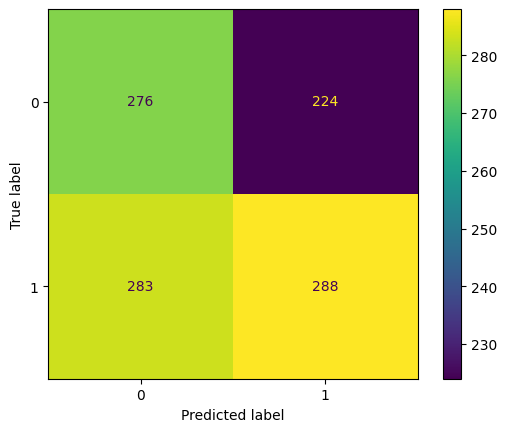

In [17]:
metrics.ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=model.classes_).plot();


In [18]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52       500
           1       0.56      0.50      0.53       571

    accuracy                           0.53      1071
   macro avg       0.53      0.53      0.53      1071
weighted avg       0.53      0.53      0.53      1071



In [19]:
X_test['prediction_LR'] = model.predict(X_test)
X_test

,Lag_1,Lag_2,Lag_3,Lag_4,prediction_LR
Date,,,,,
2019-12-12,0.002908,-0.001097,-0.003163,0.009136,1
2019-12-13,0.008575,0.002908,-0.001097,-0.003163,0
2019-12-16,0.000073,0.008575,0.002908,-0.001097,1
2019-12-17,0.007148,0.000073,0.008575,0.002908,0
2019-12-18,0.000335,0.007148,0.000073,0.008575,1
...,...,...,...,...,...
2024-03-11,-0.006529,0.010304,0.005141,-0.010193,1
2024-03-12,-0.001122,-0.006529,0.010304,0.005141,0
2024-03-13,0.011202,-0.001122,-0.006529,0.010304,0


In [20]:
X_test['return'] = df['return'][X_test.index[0]:]
X_test

,Lag_1,Lag_2,Lag_3,Lag_4,prediction_LR,return
Date,,,,,,
2019-12-12,0.002908,-0.001097,-0.003163,0.009136,1,0.008575
2019-12-13,0.008575,0.002908,-0.001097,-0.003163,0,0.000073
2019-12-16,0.000073,0.008575,0.002908,-0.001097,1,0.007148
2019-12-17,0.007148,0.000073,0.008575,0.002908,0,0.000335
2019-12-18,0.000335,0.007148,0.000073,0.008575,1,-0.000432
...,...,...,...,...,...,...
2024-03-11,-0.006529,0.010304,0.005141,-0.010193,1,-0.001122
2024-03-12,-0.001122,-0.006529,0.010304,0.005141,0,0.011202
2024-03-13,0.011202,-0.001122,-0.006529,0.010304,0,-0.001925


In [21]:
X_test['strategy'] = X_test['prediction_LR'] * X_test['return']
(X_test[['strategy','return']]+1).cumprod()-1

,strategy,return
Date,,
2019-12-12,0.008575,0.008575
2019-12-13,0.008575,0.008648
2019-12-16,0.015784,0.015858
2019-12-17,0.015784,0.016199
2019-12-18,0.015345,0.015759
...,...,...
2024-03-11,1.600298,0.629072
2024-03-12,1.600298,0.647320
2024-03-13,1.600298,0.644150


<Axes: xlabel='Date'>

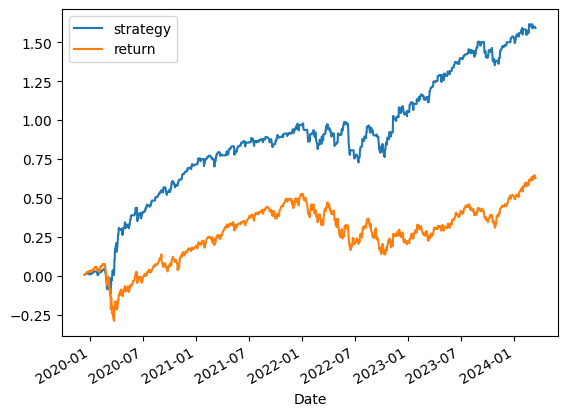

In [22]:
# In the real world, there are fees that have a high impact on buying and selling stocks.
((X_test[['strategy','return']] +1).cumprod()-1).plot()  

In [23]:
((X_test.tail(50)[['strategy','return']] +1).cumprod()-1) #In the last 50 days, this strategy lost to the S&P 500.

,strategy,return
Date,,
2024-01-04,-0.003428,-0.003428
2024-01-05,-0.001609,-0.001609
2024-01-08,0.012483,0.012483
2024-01-09,0.012483,0.010987
2024-01-10,0.018220,0.016715
2024-01-11,0.018220,0.016033
2024-01-12,0.018984,0.016796
2024-01-16,0.018984,0.013002
2024-01-17,0.013261,0.007312
